In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.0.0


In [14]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
# 将训练集拆分为训练集和验证集 共60000张图片，前5000张为验证集，后55000张为训练集
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


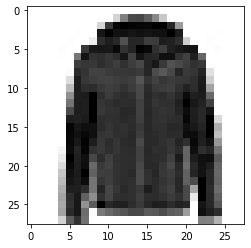

In [21]:
# 显示一张图片，查看数据集
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap="binary")
    plt.show()
show_single_image(x_train[0])

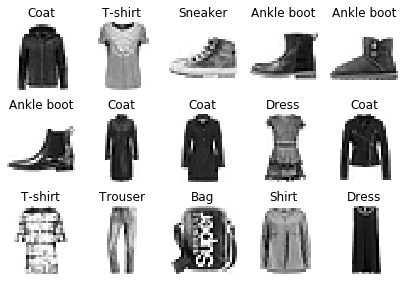

In [33]:
# 显示多张图片
def show_imgs(n_rows,n_cols,x_data,y_data,class_name):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
# 用figure定义一张大图，其中可显示子图
# figsize以英寸为单位 1英寸为 2.54cm
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = row * n_cols + col
#             共分为n_rows行，n_rows列个子图，从左上到右下的编号，起始为1
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index],cmap="binary",interpolation="nearest")
#             不显示坐标轴
            plt.axis('off')
            plt.title(class_name[y_data[index]])
    plt.show()

class_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_name)
            
    

In [53]:
#构建分类训练模型 

# tf.keras.models.Sequential()
# 定义一个顺序模型
model = keras.models.Sequential()

'''  
# 将输入矩阵[28,28]经过第一层后展平为[28*28,1]
model.add(keras.layers.Flatten(input_shape=[28,28]))
# 全连接层Dense,输出为300个节点
# relu: y = max(0, x)
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
# 最后输出10个分类,softmax会将向量变为概率
model.add(keras.layers.Dense(10,activation='softmax'))
'''

# 另一种构建模型的方式，传入一个列表，列表中为各层
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

# 损失函数loss:用sparse是因为每个y_train是一个值，而不是一个向量，需要将其转换为[10,1]的向量
# 若y_train本来就是向量的话，损失函数用categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', 
             optimizer = 'adam',
             metrics = ["accuracy"])    # 指标metrics  关系模型的精确度accuracy

In [54]:
model.layers

In [55]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [56]:
# 开始训练  返回值为训练过程中的历史数据, 可用于画图分析训练效果
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 12s 219us/sample - loss: 2.3938 - accuracy: 0.7164 - val_loss: 0.6581 - val_accuracy: 0.7718
Epoch 2/10
55000/55000 [==============================] - 12s 214us/sample - loss: 0.6381 - accuracy: 0.7751 - val_loss: 0.5851 - val_accuracy: 0.7986
Epoch 3/10
55000/55000 [==============================] - 11s 202us/sample - loss: 0.5236 - accuracy: 0.8117 - val_loss: 0.4572 - val_accuracy: 0.8462
Epoch 4/10
55000/55000 [==============================] - 11s 207us/sample - loss: 0.4500 - accuracy: 0.8405 - val_loss: 0.4380 - val_accuracy: 0.8508
Epoch 5/10
55000/55000 [==============================] - 12s 217us/sample - loss: 0.4297 - accuracy: 0.8492 - val_loss: 0.4199 - val_accuracy: 0.8584
Epoch 6/10
55000/55000 [==============================] - 11s 207us/sample - loss: 0.4111 - accuracy: 0.8551 - val_loss: 0.3922 - val_accuracy: 0.8698
Epoch 7/10
55000/55000 [=====================

In [57]:
history.history

{'loss': [2.393806980488517,
  0.6381003680922769,
  0.5235754644220526,
  0.44997192040139977,
  0.42970628767880525,
  0.4111218707604842,
  0.3988621647119522,
  0.3801788196791302,
  0.3673189907485789,
  0.3569235248630697],
 'accuracy': [0.7164364,
  0.7751455,
  0.8117273,
  0.8405091,
  0.84916365,
  0.8550909,
  0.85934544,
  0.86685455,
  0.8712,
  0.8755636],
 'val_loss': [0.6580561374187469,
  0.5850760255336761,
  0.45723344588279724,
  0.4380496613740921,
  0.4199164512395859,
  0.39217410244941714,
  0.4030305926322937,
  0.40396304478645323,
  0.3988566258251667,
  0.42487571215629577],
 'val_accuracy': [0.7718,
  0.7986,
  0.8462,
  0.8508,
  0.8584,
  0.8698,
  0.8696,
  0.8682,
  0.8678,
  0.867]}

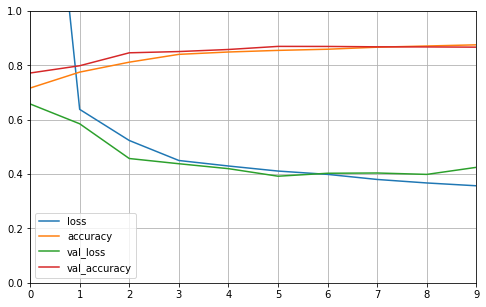

In [58]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
# 当前的图表和子图可以使用plt.gcf()和plt.gca()获得，分别表示"Get Current Figure"和"Get Current Axes"
# 设置y坐标的上下限
    plt.gca().set_ylim(0, 1)  
    plt.show()
    
plot_learning_curves(history)